622 - Design Circular Queue  
933 - Number of Recent Calls  
225 - Implement Stack using Queues  
346 - Moving Average from Data Stream   
239 - Sliding Window Maximum  


# LeetCode 622 – Design Circular Queue

🧠 Initial State (MyCircularQueue(3))  
queue    = [0, 0, 0]  
maxSize  = 3  
front    = 0  
rear     = -1  
count    = 0


In [ ]:
class MyCircularQueue:
    def __init__(self, k: int):
        # initialize queue with size k
        self.queue =[0]*k  #[0]*3 =[0,0,0]
        self.maxSize = k
        self.front = 0 #index of front element
        self.rear = -1 #index of last element
        self.count = 0 #current number of element


### enQueue

enQueue(10)  
enQueue(20)  
enQueue(30)  

| Step | Operation   | rear calculation | rear | front | count | queue state  | Return |
| ---- | ----------- | ---------------- | ---- | ----- | ----- | ------------ | ------ |
| 0    | Init        | —                | -1   | 0     | 0     | [0, 0, 0]    | —      |
| 1    | enQueue(10) | (-1+1)%3 = **0** | 0    | 0     | 1     | [10, 0, 0]   | True   |
| 2    | enQueue(20) | (0+1)%3 = **1**  | 1    | 0     | 2     | [10, 20, 0]  | True   |
| 3    | enQueue(30) | (1+1)%3 = **2**  | 2    | 0     | 3     | [10, 20, 30] | True   |


In [1]:
def enQueue(self, value: int)-> bool:
    #check if Queue is full 
    if self.isFull():
        return False
    #Move rear to next position circularly
    self.rear = (self.rear + 1) % self.maxSize
    self.queue[self.rear] = value
    self.count +=1
    return True


### Dequeue

Assume we already did:  
enQueue(10)  
enQueue(20)  
enQueue(30)

queue   = [10, 20, 30]  
front   = 0  
rear    = 2  
count   = 3   
maxSize = 3

| Step | Operation | front calculation | front | rear | count | queue (logical view) | Return |
| ---- | --------- | ----------------- | ----- | ---- | ----- | -------------------- | ------ |
| 0    | Before    | —                 | 0     | 2    | 3     | [10, 20, 30]         | —      |
| 1    | deQueue   | (0+1)%3 = **1**   | 1     | 2    | 2     | [20, 30]             | True   |



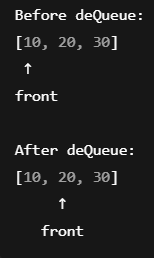

In [ ]:
def deQueue(self) -> bool:
    #check if Queue is empty
    if self.isFull():
        return False
    #Move front pointer circularly
    self.front = (self.front + 1) % self.maxSize 
    self.count -= 1
    return True


### Front

After some operations, queue looks like this:   
queue   = [10, 20, 30]   
front   = 1  
rear    = 2  
count   = 2    
👉 Logical queue = [20, 30]

| Step | Action              | Condition         | front | queue[front] | Return |
| ---- | ------------------- | ----------------- | ----- | ------------ | ------ |
| 0    | Start               | —                 | 1     | —            | —      |
| 1    | isEmpty()           | count ≠ 0 → False | 1     | —            | —      |
| 2    | return queue[front] | queue[1]          | 1     | 20           | **20** |


In [2]:
def Front(self) -> int:
    if self.isEmpty():
        return -1
    return self.queue[self.front]


### Rear
🧠 Assume Current Queue State  
Queue size = 3   
queue = [10, 20, 30]  
front = 1  
rear  = 2  
count = 2  
👉 Logical queue = [20, 30]  
| Step | Action             | Condition         | rear | queue[rear] | Return |
| ---- | ------------------ | ----------------- | ---- | ----------- | ------ |
| 0    | Start              | —                 | 2    | —           | —      |
| 1    | isEmpty()          | count ≠ 0 → False | 2    | —           | —      |
| 2    | return queue[rear] | queue[2]          | 2    | 30          | **30** |


In [ ]:
def Rear(self)->int:
    if self.isFull():
        return -1
    return self.queue[self.rear]

### Empty

In [3]:
def isEmpty(self)-> bool:
    return self.count == 0

### Full

In [4]:
def isFull(self)-> bool:
    return self.count == self.maxSize # 3==3

# 933. Number of Recent Calls

# Problem:
You have a system that receives requests (pings) at different times.  
Each request has a time t (in milliseconds).
👉 For every new request, you must answer:    
How many requests happened in the LAST 3000 milliseconds (including current one)?

ping(1)  
ping(100)  
ping(3001)  
ping(3002)

| Step | ping(t) | t-3000 | Queue before     | Append t               | Check `q[0] < t-3000` | Pop?        | Queue after         | Returned |
| ---- | ------- | ------ | ---------------- | ---------------------- | --------------------- | ----------- | ------------------- | -------- |
| 1    | 1       | -2999  | `[]`             | `[1]`                  | `1 < -2999` ❌         | No          | `[1]`               | 1        |
| 2    | 100     | -2900  | `[1]`            | `[1, 100]`             | `1 < -2900` ❌         | No          | `[1, 100]`          | 2        |
| 3    | 3001    | 1      | `[1, 100]`       | `[1, 100, 3001]`       | `1 < 1` ❌             | No          | `[1, 100, 3001]`    | 3        |
| 4    | 3002    | 2      | `[1, 100, 3001]` | `[1, 100, 3001, 3002]` | `1 < 2` ✅             | Yes (pop 1) | `[100, 3001, 3002]` | 3        |


In [ ]:
from collections import deque
class RecentCounter:
    def __init__(self):
        self.q = deque()
    def ping(self, t):
        self.q.append(t) #1,100,3001
        while self.q and self.q[0] < t - 3000:
            self.q.popleft()
        return len(self.q)    


# 225. Implement Stack using Queues

Queue → FIFO → remove from front   
Stack → LIFO → remove last pushed 

| push(x) | queue size | popleft runs?   | removed      |
| ------- | ---------- | --------------- | ------------ |
| push(1) | 1          | ❌ No            | nothing      |
| push(2) | 2          | ✅ Yes           | 1            |
| push(3) | 3          | ✅ Yes (2 times) | old elements |


In [ ]:
class MyStack:
    def __init__(self):
        from collections import deque
        self.queue = deque()
    def push(self, x:int) -> None: # x=1, x=2, x=3
        #Add new element
        self.queue.append(x) #  2,3
        # Rotate to make new element at front
        # Rotate all elements except the new one
        for _ in range(len(self.queue)-1):
            self.queue.append(self.queue.popleft()) 

    def pop(self)->int:
        if self.empty():
            return -1
        return self.queue.popleft()      

    def top(self)-> int:
        if self.empty():
            return -1  
        return self.queue[0]
    
    def empty(self)-> bool:
        return len(self.queue) == 0
    
        

# 346 - Moving Average from Data Stream   

size = 3  
inputs = [1, 10, 3, 5]  
queue = []  
sum = 0  
maxlen = 3  
 
| Step | val | Queue (before) | Is Full? | Removed (auto) | Sum (before) | Queue (after append) | Sum (after) | Average           |
| ---- | --- | -------------- | -------- | -------------- | ------------ | -------------------- | ----------- | ----------------- |
| 1    | 1   | []             | ❌ No     | –              | 0            | [1]                  | 1           | 1 / 1 = **1.0**   |
| 2    | 10  | [1]            | ❌ No     | –              | 1            | [1, 10]              | 11          | 11 / 2 = **5.5**  |
| 3    | 3   | [1, 10]        | ❌ No     | –              | 11           | [1, 10, 3]           | 14          | 14 / 3 = **4.66** |
| 4    | 5   | [1, 10, 3]     | ✅ Yes    | 1              | 14 → **13**  | [10, 3, 5]           | 18          | 18 / 3 = **6.0**  |


Queue before: [1, 10, 3]  
Incoming value: 5

Auto removal (by deque): removes 1  
So we subtract 1 from sum first

Then append 5  
Final queue: [10, 3, 5]


In [ ]:
from collections import deque
class MovingAverage:
    def __init__(self, size:int):
        self.queue = deque(maxlen = size)
        self.sum = 0
    def next(self, val:int)->float:
        # if dque is full it automatically removes oldest when appending
        if len(self.queue) == self.queue.maxlen:
            self.sum -= self.queue[0] #13
        self.queue.append(val) #10,3, 5
        self.sum += val #0+1, 1+10, 11+3
        return self.sum / len(self.queue)  #1, 11  , 4.66  , 6 

# 239. Sliding Window Maximum

You are given:

nums = [1,3,-1,-3,5,3,6,7]  
k = 3   
👉 Window size = 3  
You must:
Move a window of size k  
Find maximum in each window  

| Window | Elements    | Max |
| ------ | ----------- | --- |
| 1      | [1, 3, -1]  | 3   |
| 2      | [3, -1, -3] | 3   |
| 3      | [-1, -3, 5] | 5   |
| 4      | [-3, 5, 3]  | 5   |
| 5      | [5, 3, 6]   | 6   |
| 6      | [3, 6, 7]   | 7   |

output:- [3, 3, 5, 5, 6, 7]


Best approach = Deque   
Stores indices  
Values in deque are decreasing  
Front of deque = maximum

nums = [1, 3, 2]
k = 2  
Expected output:    
[3, 3]  

❗ VERY IMPORTANT BASICS (PLEASE READ)
- dq stores INDICES, not values
- dq[0] → index of current maximum
- popleft() → removes OLD index (out of window)
- pop() → removes SMALLER value from back
- Window size = k = 2

| i | nums[i] | i-k | dq before (idx) | dq before (val) | Step-1: dq[0]==i-k? | Step-2: nums[dq[-1]] < nums[i]? | Action    | dq after (idx) | dq after (val) | i>=k-1  | ans   |
| - | ------- | --- | --------------- | --------------- | ------------------- | ------------------------------- | --------- | -------------- | -------------- | ------- | ----- |
| 0 | 1       | -2  | []              | []              | ❌ dq empty          | ❌                               | append(0) | [0]            | [1]            | ❌ (0<1) | []    |
| 1 | 3       | -1  | [0]             | [1]             | ❌ (0≠-1)            | ✅ (1<3 → pop 0)                 | append(1) | [1]            | [3]            | ✅       | [3]   |
| 2 | 2       | 0   | [1]             | [3]             | ❌ (1≠0)             | ❌ (3<2 false)                   | append(2) | [1,2]          | [3,2]          | ✅       | [3,3] |

- popleft() → removes index outside window
- pop() → removes smaller elements
- front of dq always stores index of maximum


In [ ]:
from collections import deque
class Solution:
    def maxSlidingWindow(self, nums, k):
        dq = deque()   # stores indices
        ans = []
        for i in range(len(nums)): 
            # 1️⃣ Remove indices out of window
            if dq and dq[0] == i - k: 
                dq.popleft()
            # 2️⃣ Remove smaller elements from back
            while dq and nums[dq[-1]] < nums[i]: #1<3, 3 <2
                dq.pop()
            # 3️⃣ Add current index
            dq.append(i) #1, 2
            # 4️⃣ Window ready → record max
            if i >= k-1: #0>2-1, 1>=2-1, 2 >= 2-1
                ans.append(nums[dq[0]]) #3,3
        return ans  #3,3     
           


nums = [2, 1, 3]  
windows (k=2):     
[2,1] → max = 2  
[1,3] → max = 3
